## Introducción

Encontrar los **mejores lugares para abrir 200 pozos nuevos** de petróleo en la compañía de extacción de petróleo OilyGiant
- Vamos a crear un modelo para predecir el volumen de reservas en pozos nuevos.
- Elegir los pozos petrolíferos que tienen los valores estimados más altos.
- Elegir la región con el **beneficio total** más alto para los pozos petrolíferos seleccionados.

- Crear un modelo que ayude a elegir la región con **el mayor margen de beneficio**. Analizar los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

## Condiciones:

- Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
- Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
- Después de la evaluación de riesgo, mantendremos solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.
- Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

## Descripción de los datos

Los datos de exploración geológica de las tres regiones se almacenan en estos 3 archivos:

- 'geo_data_0.csv'. 
- 'geo_data_1.csv'. 
- 'geo_data_2.csv'. 


  - `id`  — identificador único de pozo de petróleo
  - `f0, f1, f2` — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
  -`product`— volumen de reservas en el pozo de petróleo (miles de barriles).

#  IMPORTAMOS LIBRERIAS Y CARGAMOS EL DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.utils import resample
from scipy import stats as st
from numpy.random import RandomState

In [2]:
data_0 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_0.csv')
data_1 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_1.csv')
data_2 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/geo_data_2.csv')

# EXPLORAMOS  EL DATASET

## Region 1

In [3]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_0.duplicated().sum()

0

## Vamos a ver como se distribuyen los datos de la variable a predecir

<AxesSubplot:>

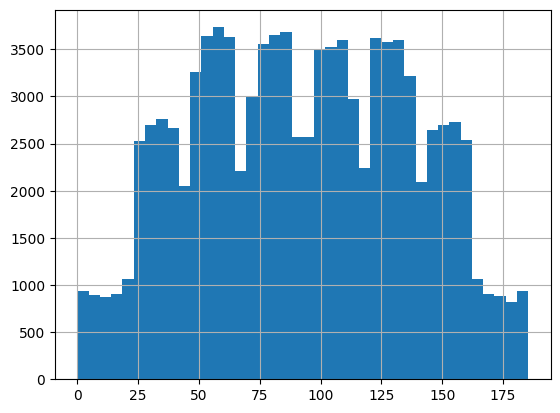

In [6]:
data_0['product'].hist(bins=40)

In [7]:
data_0['product'].max()

185.3643474222929

In [8]:
data_0['product'].min()

0.0

In [9]:
data_0[data_0['product'] < 1]

,id,f0,f1,f2,product
307,Y4DnV,0.502926,0.593209,-2.399415,0.078123
2229,NDc1S,0.763198,0.658588,-0.558619,0.038252
3784,mXdEt,0.086728,1.128861,-0.525895,0.050657
3789,dQc8v,0.710330,0.423648,0.424131,0.621153
4109,3RhgB,-0.714156,0.829910,3.795402,0.888251
...,...,...,...,...,...
97721,oZ3UJ,0.701532,0.808797,-2.221334,0.004022
97827,CVxJ4,-0.748880,0.584331,1.562582,0.722188
98058,U7LCe,-0.504360,0.754723,2.404490,0.250788
99489,IO55C,-0.531047,1.026292,0.764586,0.207958


## Region 2

In [10]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [11]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
data_1.duplicated().sum()

0

## Vamos a ver como se distribuyen los datos de la variable a predecir


<AxesSubplot:>

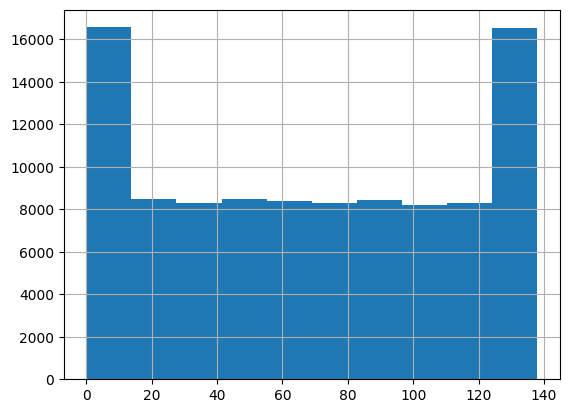

In [13]:
data_1['product'].hist(bins=10)

In [14]:
data_1['product'].max()

137.94540774090564

In [15]:
data_1['product'].min()

0.0

In [16]:
(data_1['product'] < 1).sum()

8235

In [17]:
(data_1['product'] > 120).sum()

16537

## Region 3

In [18]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [19]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [20]:
data_2.duplicated().sum()

0

## Vamos a ver como se distribuyen los datos de la variable a predecir


<AxesSubplot:>

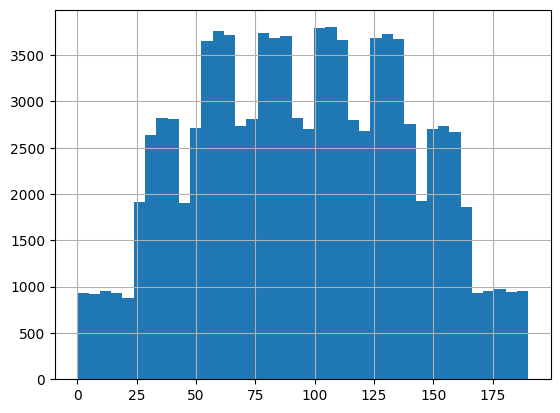

In [21]:
data_2['product'].hist(bins=40)

In [22]:
data_2['product'].max()

190.0298383433513

In [23]:
data_2['product'].min()

0.0

In [24]:
(data_2['product'] < 1) .sum()

191

### Exploración inicial de los datos(resumen)

Podemos ver que en las tres regiones cuentan cada una con 100,000 filas y 5 columnas; las cuales el tipo de dato es correcto y no hay valores nulos, vamos a eliminar una columna en nuestro dataframe que no nos aporta informacion para evitar que nuestro modelo nos haga malas predicciones y posteriormente procederemos a separar caracteristicas y objetivos para el entrenamiento del modelo en cada region.Tambien pudimos observar con un histograma como se distribuyen los datos con la variable a predecir!!

In [25]:
# eliminamos la columna que no aporta informacion en nuestro modelo en cada dataframe
data_0 = data_0.drop('id', axis=1)
data_1 = data_1.drop('id', axis=1)
data_2 = data_2.drop('id', axis=1)

In [26]:
data_0.shape

(100000, 4)

In [27]:
data_1.shape

(100000, 4)

In [28]:
data_2.shape

(100000, 4)

listo nos quedamos con los datos escenciales

# SEPARAR CARACTERISTICAS Y OBJETIVOS  Y   DIVISION DE DATOS EN CONJUNTOS DE ENTRENAMIENTO Y VALIDACION

In [29]:
# Separar caracteristicas y objetivos de cada región

# Region 1
features_0 = data_0.drop('product', axis=1)
target_0 = data_0['product']

# Region 2
features_1 = data_1.drop('product', axis=1)
target_1 = data_1['product']

# Region 3
features_2 = data_2.drop('product', axis=1)
target_2 = data_2['product']

In [30]:
#Dividimos nuestro conjunto de datos entrenamiento 75% y validación 25% de cada región

#Region 1
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features_0, target_0, test_size=.25, random_state=12345)

# Region 2
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features_1, target_1, test_size=.25, random_state=12345)

# Region 3
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features_2, target_2, test_size=.25, random_state=12345)

# CREACION DE MODELO Y ENTRENAMIENTO

In [31]:
# Crear el modelo de regresión lineal para cada región
model_0 = LinearRegression()
model_1 = LinearRegression()
model_2 = LinearRegression()


In [32]:
# Entrenar el modelo en cada región
model_0.fit(features_train_0, target_train_0)
model_1.fit(features_train_1, target_train_1)
model_2.fit(features_train_2, target_train_2)

LinearRegression()

In [33]:
# Obtén las predicciones del modelo en el conjunto de validación y calcula el RECM y R^2 para cada región
predictions_valid_0 = model_0.predict(features_valid_0) 
rmse_0 = mean_squared_error(target_valid_0, predictions_valid_0)**0.5
# Calcula el volumen medio de reservas predicho
volumen_medio_predicho_0 = np.mean(predictions_valid_0)
r2_0 = r2_score(target_valid_0, predictions_valid_0)
print("Volumen medio de reservas predicho para la Región 1:", volumen_medio_predicho_0)
print("RMSE del modelo de regresión lineal en el conjunto de validación para la región 1:", rmse_0)
print("R^2 del modelo de regresión lineal en el conjunto de validación para la región 1:", r2_0)
print()

predictions_valid_1 = model_1.predict(features_valid_1) 
rmse_1 = mean_squared_error(target_valid_1, predictions_valid_1)**0.5
# Calcula el volumen medio de reservas predicho
volumen_medio_predicho_1 = np.mean(predictions_valid_1)
r2_1 = r2_score(target_valid_1, predictions_valid_1)
print("Volumen medio de reservas predicho para la Región 2:", volumen_medio_predicho_1)
print("RMSE del modelo de regresión lineal en el conjunto de validación para la región 2:", rmse_1)
print("R^2 del modelo de regresión lineal en el conjunto de validación para la región 2:", r2_1)
print()

predictions_valid_2 = model_2.predict(features_valid_2) 
rmse_2 = mean_squared_error(target_valid_2, predictions_valid_2)**0.5
# Calcula el volumen medio de reservas predicho
volumen_medio_predicho_2 = np.mean(predictions_valid_2)
r2_2 = r2_score(target_valid_2, predictions_valid_2)
print("Volumen medio de reservas predicho para la Región 3:", volumen_medio_predicho_2)
print("RMSE del modelo de regresión lineal en el conjunto de validación para la región 3:", rmse_2)
print("R^2 del modelo de regresión lineal en el conjunto de validación para la región 3:", r2_2)

Volumen medio de reservas predicho para la Región 1: 92.59256778438035
RMSE del modelo de regresión lineal en el conjunto de validación para la región 1: 37.5794217150813
R^2 del modelo de regresión lineal en el conjunto de validación para la región 1: 0.27994321524487786

Volumen medio de reservas predicho para la Región 2: 68.728546895446
RMSE del modelo de regresión lineal en el conjunto de validación para la región 2: 0.893099286775617
R^2 del modelo de regresión lineal en el conjunto de validación para la región 2: 0.9996233978805127

Volumen medio de reservas predicho para la Región 3: 94.96504596800489
RMSE del modelo de regresión lineal en el conjunto de validación para la región 3: 40.02970873393434
R^2 del modelo de regresión lineal en el conjunto de validación para la región 3: 0.20524758386040443


## Region 1

El RMSE (Root Mean Squared Error) es de aproximadamente 37.58.
El coeficiente de determinación 
𝑅
2
R 
2
  es de aproximadamente 0.28.
Un RMSE más bajo indica un mejor ajuste del modelo a los datos, mientras que un 
𝑅
2
R 
2
  más cercano a 1 indica una mejor capacidad del modelo para explicar la variabilidad en los datos. En este caso, el 
𝑅
2
R 
2
  es bajo, lo que sugiere que el modelo explica solo una pequeña parte de la variabilidad en los datos.

## Region 2

El RMSE es sorprendentemente bajo, alrededor de 0.89.
El coeficiente de determinación 
𝑅
2
R 
2
  es cercano a 1, específicamente 0.9996.
Estos resultados indican que el modelo tiene un ajuste casi perfecto a los datos en esta región, con un 
𝑅
2
R 
2
  muy alto y un RMSE muy bajo.

## Region 3

El RMSE es de aproximadamente 40.03.
El coeficiente de determinación 
𝑅
2
R 
2
  es de aproximadamente 0.21.
Similar a la Región 1, el 
𝑅
2
R 
2
  es bajo, lo que sugiere que el modelo tiene dificultades para explicar la variabilidad en los datos.

## conclusiones del modelo en las 3 regiones

En resumen, mientras que los modelos en las Regiones 1 y 3 parecen tener un rendimiento similar con 
𝑅
2
R 
2
  bajos, el modelo en la Región 2 parece tener un rendimiento excepcionalmente bueno

# Preparar el calculo de ganancias

Si la inversion fue de 100,000,000 de dolares por 200 pozos, cada pozo debe mínimo producir 500,000 dolares en unidades serían 111.1 para evitar perdidas!
- Vamos a comparar estas unidades con la cantidad media de unidades en cada Región.

In [34]:
volumen_medio_predicho_0 = np.mean(predictions_valid_0)
print('Región 1 cantidad media de unidades :', volumen_medio_predicho_0, ' //  Producción minima en unidades_ 111.1')
volumen_medio_predicho_1 = np.mean(predictions_valid_1)
print('Región 2 cantidad media de unidades :', volumen_medio_predicho_1, ' //  Producción minima en unidades_ 111.1')
volumen_medio_predicho_2 = np.mean(predictions_valid_2)
print('Región 3 cantidad media de unidades :', volumen_medio_predicho_2, ' //  Producción minima en unidades_ 111.1')

Región 1 cantidad media de unidades : 92.59256778438035  //  Producción minima en unidades_ 111.1
Región 2 cantidad media de unidades : 68.728546895446  //  Producción minima en unidades_ 111.1
Región 3 cantidad media de unidades : 94.96504596800489  //  Producción minima en unidades_ 111.1


Podemos observar a simple vista que la region 1 y 3 son las que más se acercan a las producción minima de unidades que es de 111.1

## **Ahora vamos a calcular el beneficio**

In [35]:
# Gastos operativos (Gastos operativos son todos los gastos relacionados con las operaciones comerciales de la empresa)
presupuesto = 100_000_000 #dolares
valor_una_unidad = 4500

## Funcion para calcular la ganancia de un conjunto de pozos de petróleo seleccionados (sin usar bootstrapping)

In [37]:
def profit(predicciones, target_valid, pago_por_unidad, presupuesto, top_n=200):
    
  
    # Obtener los índices de los mejores 'top_n' pozos
    mejores_indices = np.argsort(predicciones)[-top_n:]

    # Filtrar el target_valid usando los índices obtenidos
    mejores_pozos = target_valid.iloc[mejores_indices]

    # Sumar el target de los mejores pozos
    suma_mejores_pozos = np.sum(mejores_pozos)

    # Calcular la ganancia
    ganancia = (suma_mejores_pozos * pago_por_unidad) - presupuesto

    return ganancia

ganancia_1 = profit(predictions_valid_0, target_valid_0, valor_una_unidad, presupuesto)
ganancia_2 = profit(predictions_valid_1, target_valid_1, valor_una_unidad, presupuesto)
ganancia_3 = profit(predictions_valid_2, target_valid_2, valor_una_unidad, presupuesto)

print("Ganancia esperada Region 1:", ganancia_1)
print("Ganancia esperada Region 2:", ganancia_2)
print("Ganancia esperada Region 3:", ganancia_3)

Ganancia esperada Region 1: 33208260.43139851
Ganancia esperada Region 2: 24150866.966815114
Ganancia esperada Region 3: 27103499.635998324


## Conclusiones de esta seccion

Podemos concluir que la Región 1 sería la adecuada para el desarrollo de 200 pozos petrolíferos ya que pudieramos generar una ganancia de 33,208,260 dolares!! con una inversion de 100,000,000 de dolares!!

# Riesgos y Ganacias para cada region

- Utilizaremos las predicciones que almacenamos  para realizar el submuestreo con la técnica del bootstrapping 
- Posteriormente encontraremos el beneficio promedio
- El intervalo de confianza del 95%
- Riesgo de perdidas


In [101]:
state = np.random.RandomState(12345)
def bootstrapping(target, predictions,valor_una_unidad,presupuesto):        
    target = target.reset_index(drop=True)
    profits = []
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        pred_subsample = pd.Series(predictions).iloc[target_subsample.index]
        profits.append(profit(pred_subsample,target_subsample,valor_una_unidad,presupuesto)) 
    profits = pd.Series(profits)
    
    # Calcular la media
    media = profits.mean()

    # Calcular el intervalo de confianza al 95% usando los cuantiles
    intervalo_confianza = profits.quantile([0.025, 0.975])

    # Calcular el riesgo como la proporción de profits menores a 0
    riesgo = (profits < 0).mean()

    return {
        "profits": profits,
        "media": media,
        "intervalo_confianza": intervalo_confianza,
        "riesgo": riesgo
    }

    
                           
                        

    

In [102]:
region_1 = bootstrapping(target_valid_0, predictions_valid_0,valor_una_unidad,presupuesto)
region_1


{'profits': 0      6.054641e+06
 1      5.363934e+06
 2      2.937858e+06
 3      1.789934e+06
 4      2.719929e+06
            ...     
 995    5.253551e+06
 996    7.790094e+06
 997    6.494122e+06
 998    3.149995e+06
 999    2.197184e+06
 Length: 1000, dtype: float64,
 'media': 3961649.848023711,
 'intervalo_confianza': 0.025   -1.112155e+06
 0.975    9.097669e+06
 dtype: float64,
 'riesgo': 0.069}

In [91]:
region_2 = bootstrapping(target_valid_1, predictions_valid_1,valor_una_unidad,presupuesto)
region_2

{'profits': 0      3.178949e+06
 1      1.010041e+06
 2      1.295538e+06
 3      5.105900e+06
 4      5.512065e+06
            ...     
 995    5.805026e+06
 996    4.812317e+06
 997    2.237244e+06
 998    1.019198e+07
 999    2.458675e+06
 Length: 1000, dtype: float64,
 'media': 4611558.1727723945,
 'intervalo_confianza': 0.025    7.805081e+05
 0.975    8.629521e+06
 dtype: float64,
 'riesgo': 0.007}

In [92]:
region_3 = bootstrapping(target_valid_2, predictions_valid_2,valor_una_unidad,presupuesto)
region_3
                        

{'profits': 0      7.433808e+06
 1      5.687995e+06
 2      2.468884e+06
 3      3.901355e+06
 4      5.309689e+06
            ...     
 995    3.775866e+06
 996    2.242284e+06
 997    3.426094e+06
 998    7.545774e+06
 999   -1.156280e+05
 Length: 1000, dtype: float64,
 'media': 3929504.751706046,
 'intervalo_confianza': 0.025   -1.122276e+06
 0.975    9.345629e+06
 dtype: float64,
 'riesgo': 0.065}

# Conclusiones generales:

Podemos observar de a cuerdo a nuestra funcion de bootstrapping que la region 2 cuenta con una media más alta que las otras regiones su media es un poco más de 4 millones de dolares en ganancias y con un riesgo menor!

**Eligiendo a la Región 2 para abrir los 200 nuevos pozos petroleros!!**